# Big Data Management and Processing, Sofia, 2025

## Coursework - *Data Pipeline Development for Effective Data Management and Processing*

### Music Industry Trends Analysis
### Created by Martin Marinov (7MI3400539) and Nikola Mihaylov (6MI3400619)

**1. Data Ingestion**

For our project, we decided to use the "Top Spotify Songs in 73 Countries (Daily Updated)" dataset from Kaggle (https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated). As of 9th January, the dataset contains 1,584,257 rows and 25 columns, offering a vast repository of information on daily music streaming trends across 73 countries. The dataset was acquired using the Spotify API, ensuring accurate and up-to-date information.
Here is a columns overview:
- **spotify_id**: The unique identifier for the song in the Spotify database.
- **name**: The title of the song.
- **artists**: The name(s) of the artist(s) associated with the song. 
- **daily_rank**: The daily rank of the song in the top 50 list.
- **daily_movement**: The change in rankings compared to the previous day.
- **weekly_movement**: The change in rankings compared to the previous week.
- **country**: The ISO code of the country of the Top 50 Playlist. If Null, then the playlist if 'Global Top 50'.
- **snapshot_date**: The date on which the data was collected from the Spotify API. 
- **popularity**: A measure of the song's current popularity on Spotify.
- **is_explicit**: Indicates whether the song contains explicit lyrics.
- **duration_ms**: The duration of the song in milliseconds.
- **album_name**: The title of the album the song belongs to. 
- **album_release_date**: The release date of the album the song belongs to.
- **danceability**: A measure of how suitable the song is for dancing based on various musical elements.
- **energy**: A measure of the intensity and activity level of the song.
- **key**: The key of the song.
- **loudness**: The overall loudness of the song in decibels.
- **mode**: Indicates whether the song is in a major or minor key.
- **speechiness**: A measure of the presence of spoken words in the song.
- **acousticness**: A measure of the acoustic quality of the song.
- **instrumentalness**: A measure of the likelihood that the song does not contain vocals.
- **liveness**: A measure of the presence of a live audience in the recording.
- **valence**: A measure of the musical positiveness conveyed by the song.
- **tempo**: The tempo of the song in beats per minute.
- **time_signature**: The estimated overall time signature of the song.


In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

tracks = pd.read_csv('universal_top_spotify_songs.csv')
tracks.shape

(1584257, 25)

In [34]:
tracks.head()

spotify_id                name                artists  \
0  2plbrEY59IikOBgBGLjaoe    Die With A Smile  Lady Gaga, Bruno Mars   
1  4wJ5Qq0jBN4ajy7ouZIV1c                APT.       ROSÉ, Bruno Mars   
2  7ne4VBA60CxGM75vw0EYad      That’s So True          Gracie Abrams   
3  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER          Billie Eilish   
4  5TFD2bmFKGhoCRbX61nXY5            NUEVAYoL              Bad Bunny   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               0                0     NaN    2025-01-08   
1           2               0                0     NaN    2025-01-08   
2           3               0                0     NaN    2025-01-08   
3           4               0                0     NaN    2025-01-08   
4           5               1               45     NaN    2025-01-08   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0         100        False  ...    6   -7.777    0       0.0304        0.3080   
1          89        False  ...    0   -4.477    0       0.2600        0.0283   
2          96         True  ...    1   -4.169    1       0.0368        0.2140   
3          97        False  ...    2  -10.171    1       0.0358        0.2000   
4          81        False  ...    6  -20.024    1       0.1390        0.2650   

   instrumentalness  liveness  valence    tempo  time_signature  
0            0.0000     0.122    0.535  157.969               3  
1            0.0000     0.355    0.939  149.027               4  
2            0.0000     0.159    0.372  108.548               4  
3            0.0608     0.117    0.438  104.978               4  
4            0.9950     0.204    0.120  137.922               4  

[5 rows x 25 columns]

**2. Data Cleaning**

Let’s start by examining some basic information about the dataset. After that, we’ll proceed to handle missing data, remove duplicates, and check for any inconsistencies within the data.

In [35]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584257 entries, 0 to 1584256
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1584257 non-null  object 
 1   name                1584228 non-null  object 
 2   artists             1584229 non-null  object 
 3   daily_rank          1584257 non-null  int64  
 4   daily_movement      1584257 non-null  int64  
 5   weekly_movement     1584257 non-null  int64  
 6   country             1562650 non-null  object 
 7   snapshot_date       1584257 non-null  object 
 8   popularity          1584257 non-null  int64  
 9   is_explicit         1584257 non-null  bool   
 10  duration_ms         1584257 non-null  int64  
 11  album_name          1583437 non-null  object 
 12  album_release_date  1583600 non-null  object 
 13  danceability        1584257 non-null  float64
 14  energy              1584257 non-null  float64
 15  key            

We have reviewed the data types of the columns; now, let's examine the summary statistics for the numerical values and the count of unique values in each categorical column.

In [36]:
tracks.describe().round(2)

daily_rank  daily_movement  weekly_movement  popularity  duration_ms  \
count  1584257.00      1584257.00       1584257.00  1584257.00   1584257.00   
mean        25.49            0.95             2.88       76.25    192564.91   
std         14.43            7.07            12.19       15.67     49496.96   
min          1.00          -49.00           -49.00        0.00         0.00   
25%         13.00           -1.00            -3.00       65.00    160688.00   
50%         25.00            0.00             0.00       80.00    185000.00   
75%         38.00            2.00             5.00       88.00    217259.00   
max         50.00           49.00            49.00      100.00    939666.00   

       danceability      energy         key    loudness        mode  \
count    1584257.00  1584257.00  1584257.00  1584257.00  1584257.00   
mean           0.68        0.65        5.53       -6.46        0.54   
std            0.14        0.16        3.58        2.66        0.50   
min            0.00        0.00        0.00      -54.34        0.00   
25%            0.59        0.55        2.00       -7.78        0.00   
50%            0.70        0.67        6.00       -5.98        1.00   
75%            0.79        0.76        9.00       -4.69        1.00   
max            0.99        1.00       11.00        3.23        1.00   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   1584257.00    1584257.00        1584257.00  1584257.00  1584257.00   
mean          0.09          0.27              0.02        0.17        0.55   
std           0.09          0.25              0.09        0.12        0.23   
min           0.00          0.00              0.00        0.01        0.00   
25%           0.04          0.07              0.00        0.10        0.37   
50%           0.06          0.19              0.00        0.12        0.55   
75%           0.11          0.44              0.00        0.20        0.74   
max           0.94          1.00              1.00        0.98        0.99   

            tempo  time_signature  
count  1584257.00       1584257.0  
mean       122.29             3.9  
std         28.18             0.4  
min          0.00             0.0  
25%        100.01             4.0  
50%        119.96             4.0  
75%        140.11             4.0  
max        236.09             5.0

In [37]:
tracks.select_dtypes(include=['object']).nunique()

spotify_id            19104
name                  16872
artists               10893
country                  72
snapshot_date           437
album_name            12745
album_release_date     2525
dtype: int64

It's time to check if there are any missing values in the dataset.

In [38]:
tracks.isnull().sum()

spotify_id                0
name                     29
artists                  28
daily_rank                0
daily_movement            0
weekly_movement           0
country               21607
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              820
album_release_date      657
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

Based on the dataset description, we can see that the null values in the 'country' column correspond to the "Global Top 50" chart. As a result, we will fill these null values with the value 'Global'. We will drop the rows with null values in the 'name' and 'artist' columns but will retain those with null values in the 'album_name' and 'album_release_date' columns. This is because the presence of null values in these columns still provides useful information about the song, and the album name and release date are not critical for our analysis. Null values in these columns will be ignored if necessary.

In [39]:
tracks['country'] = tracks['country'].fillna('Global')
tracks.dropna(subset=['name', 'artists'], inplace=True)
tracks.isnull().sum()

spotify_id              0
name                    0
artists                 0
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name            791
album_release_date    629
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

Let's now see if we have any duplicated rows in the dataset.

In [40]:
duplicates = tracks[tracks.duplicated()]

print(len(duplicates))

0


We will drop the 'spotify_id' column since it doesn't give any information.

In [41]:
tracks = tracks.drop(columns="spotify_id")
tracks.columns

Index(['name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement',
       'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms',
       'album_name', 'album_release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

**3. Data Transformation**

We will make several transformations to our dataset. First, we will add a new column, 'continent,' to group countries by their respective continents, enabling us to extract insights and identify trends at the continental level later. Additionally, we will convert the 'country' column from its ISO-2 code format to the full country name to improve readability and enhance visualization.

In [42]:
import pycountry_convert as pc

def get_continent(code):
    if code == 'Global':
        return 'Global'
    try:
        continent_code = pc.country_alpha2_to_continent_code(code)
        continent_name_map = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continent_name_map[continent_code]
    except Exception:
        print(f"Invalid code {code}")

tracks['continent'] = tracks['country'].apply(get_continent)

tracks['continent'].unique()


array(['Global', 'Africa', 'Asia', 'South America', 'North America',
       'Europe', 'Oceania'], dtype=object)

In [43]:
import pycountry as pc

def iso_to_country_name(code):
    if code == 'Global':
        return 'Global'
    try:
        return pc.countries.get(alpha_2=code).name
    except AttributeError:
        print(f"Invalid code {code}")

tracks['country'] = tracks['country'].apply(iso_to_country_name)
tracks['country'].unique()


array(['Global', 'South Africa', 'Viet Nam',
       'Venezuela, Bolivarian Republic of', 'Uruguay', 'United States',
       'Ukraine', 'Taiwan, Province of China', 'Türkiye', 'Thailand',
       'El Salvador', 'Slovakia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Romania', 'Paraguay', 'Portugal', 'Poland', 'Pakistan',
       'Philippines', 'Peru', 'Panama', 'New Zealand', 'Norway',
       'Netherlands', 'Nicaragua', 'Nigeria', 'Malaysia', 'Mexico',
       'Morocco', 'Latvia', 'Luxembourg', 'Lithuania', 'Kazakhstan',
       'Korea, Republic of', 'Japan', 'Italy', 'Iceland', 'India',
       'Israel', 'Ireland', 'Indonesia', 'Hungary', 'Honduras',
       'Hong Kong', 'Guatemala', 'Greece', 'France', 'Finland', 'Spain',
       'Egypt', 'Estonia', 'Ecuador', 'Dominican Republic', 'Denmark',
       'Germany', 'Czechia', 'Costa Rica', 'Colombia', 'Chile',
       'Switzerland', 'Canada', 'Belarus', 'Brazil',
       'Bolivia, Plurinational State of', 'Bulgaria', 'Belgium',
       'Australia

Next, let's analyze the 'artists' column, as it may include multiple artists separated by commas.

In [44]:
artists = tracks['artists'].str.split(', ', expand=True)
artists.nunique()

0     6383
1     3958
2     1698
3      653
4      299
5      157
6       72
7       33
8       25
9       15
10      11
11       6
12       3
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       1
21       1
22       1
23       1
24       1
25       1
dtype: int64

We observe that some songs have up to 26 artists, which seems unusual. To manage the dataset size and avoid excessive null values in the artists' columns, we will limit the number of artists per song to a maximum of 4. The first column will represent the main artist, while the remaining three will be considered featured artists.

In [45]:
artists.drop(artists.iloc[:, 4:26 ], axis=1, inplace=True)

artists_column_map = {
    0: 'main_artist',
    1: 'feature_1',
    2: 'feature_2',
    3: 'feature_3'
}

artists.rename(columns=artists_column_map, inplace=True)
tracks = pd.concat([artists, tracks], axis=1)
tracks.drop(['artists'], axis=1, inplace=True)
tracks.columns

Index(['main_artist', 'feature_1', 'feature_2', 'feature_3', 'name',
       'daily_rank', 'daily_movement', 'weekly_movement', 'country',
       'snapshot_date', 'popularity', 'is_explicit', 'duration_ms',
       'album_name', 'album_release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'continent'],
      dtype='object')

Let's also convert the snapshot_date and the album_release_date to datetime format so it can be usable.

In [46]:
tracks['snapshot_date'] = pd.to_datetime(tracks['snapshot_date'])
tracks['album_release_date'] = pd.to_datetime(tracks['album_release_date'])
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1584228 entries, 0 to 1584256
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   main_artist         1584228 non-null  object        
 1   feature_1           637439 non-null   object        
 2   feature_2           192036 non-null   object        
 3   feature_3           59853 non-null    object        
 4   name                1584228 non-null  object        
 5   daily_rank          1584228 non-null  int64         
 6   daily_movement      1584228 non-null  int64         
 7   weekly_movement     1584228 non-null  int64         
 8   country             1584228 non-null  object        
 9   snapshot_date       1584228 non-null  datetime64[ns]
 10  popularity          1584228 non-null  int64         
 11  is_explicit         1584228 non-null  bool          
 12  duration_ms         1584228 non-null  int64         
 13  album_name       

**4. Data Aggregation**

In [47]:
artist_data = tracks.melt(
    id_vars=['name', 'popularity', 'danceability', 'energy', 'loudness'], 
    value_vars=['main_artist', 'feature_1', 'feature_2', 'feature_3'], 
    value_name='artist'
)
artist_data = artist_data.dropna(subset=['artist'])

artist_agg = artist_data.groupby('artist').agg(
    unique_song_count=('name', 'nunique'),
    avg_danceability=('danceability', 'mean'),
    avg_energy=('energy', 'mean'),
    avg_loudness=('loudness', 'mean')
).reset_index()

print(artist_agg)

                 artist  unique_song_count  avg_danceability  avg_energy  \
0     #nācgavilēt koris                  1          0.511000    0.606000   
1      $$Double-Dolla$$                  2          0.778500    0.620000   
2             $OHO BANI                  3          0.692031    0.643667   
3            $ONO$ CLIQ                  1          0.902000    0.904000   
4                $hirak                  6          0.859363    0.643901   
...                 ...                ...               ...         ...   
9901              音田 雅則                  1          0.812000    0.640000   
9902                颜人中                  2          0.684197    0.534745   
9903            高爾宣 OSN                  3          0.638392    0.677303   
9904                다레기                  2          0.832000    0.683500   
9905              뷰티풀너드                  1          0.868000    0.823000   

      avg_loudness  
0        -5.467000  
1        -9.711500  
2        -6.704335  
3  

**5. Exploratory Data Analysis (EDA)**

Let's begin by exploring the time range covered in our dataset to understand its temporal scope:

In [48]:
print(f"The earliest snapshot_date in the dataset is: {tracks['snapshot_date'].min()}")
print(f"The latest snapshot_date in the dataset is: {tracks['snapshot_date'].max()}")

The earliest snapshot_date in the dataset is: 2023-10-18 00:00:00
The latest snapshot_date in the dataset is: 2025-01-08 00:00:00


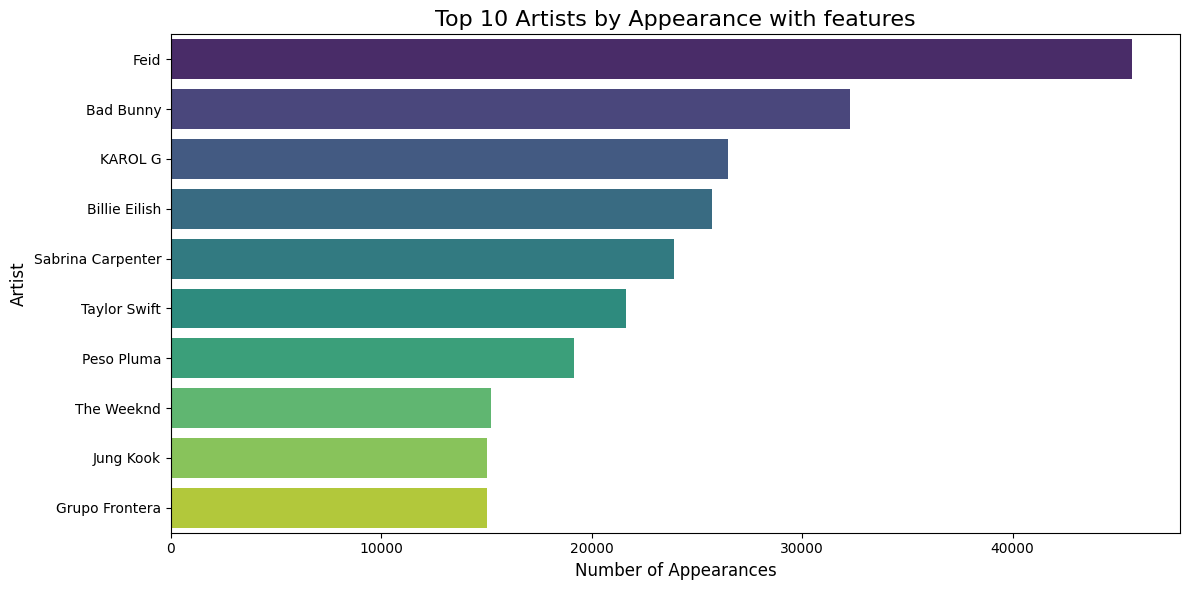

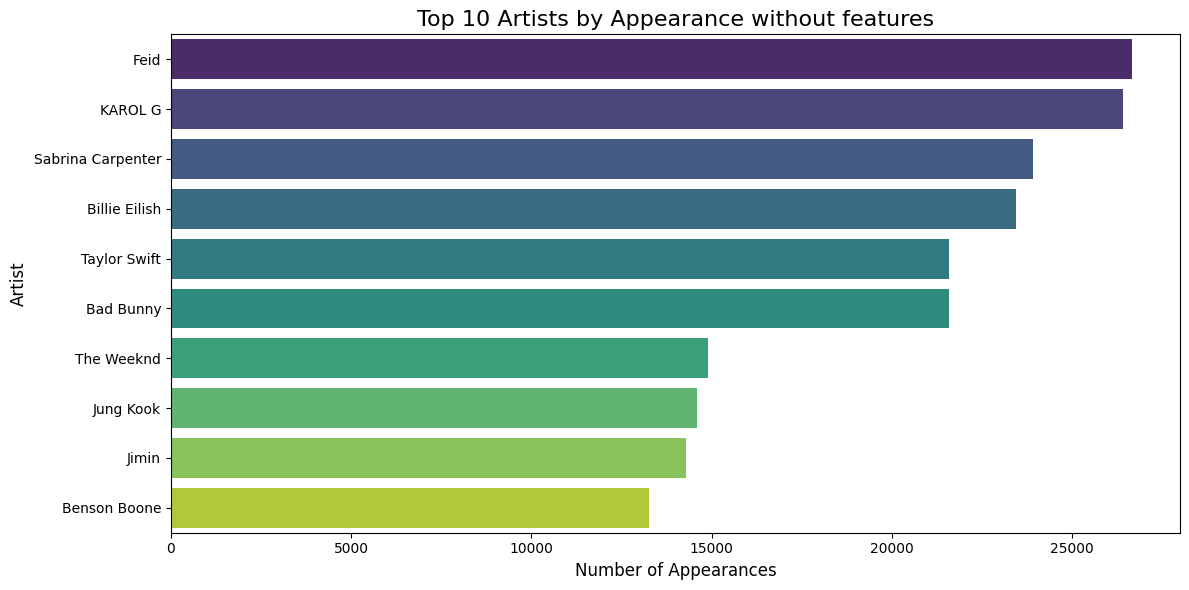

In [49]:
def get_top_artists(data, column_name, top_n=10):
    top_artists = (
        data[column_name]
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    top_artists.columns = ['artist', 'appearance_count']
    return top_artists


def plot_bar_chart(data, x, y, hue, title, xlabel, ylabel, palette='pastel'):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=data, 
        x=x, 
        y=y, 
        hue=hue, 
        palette=palette, 
        dodge=False, 
        legend=False
    )
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

top_artists_data = (get_top_artists(artist_data, 'artist'), 'Top 10 Artists by Appearance with features'), (get_top_artists(tracks, 'main_artist'), 'Top 10 Artists by Appearance without features')

for top_data in top_artists_data:
    data, title = top_data
    plot_bar_chart(
        data, 
        x='appearance_count', 
        y='artist',
        hue='artist', 
        title=title, 
        xlabel='Number of Appearances', 
        ylabel='Artist',
        palette='viridis'
)

As observed, the Colombian singer Feid dominates as the most popular artist, even when excluding his featured appearances—though his total presence decreases slightly in this adjusted metric. On the other hand, Bad Bunny experiences a significant drop, falling four positions in the "without features" chart due to his extensive presence as a featured artist in various tracks. Beyond these notable changes, the rankings remain largely consistent between the two charts, with only minor variations observed in the lower positions.

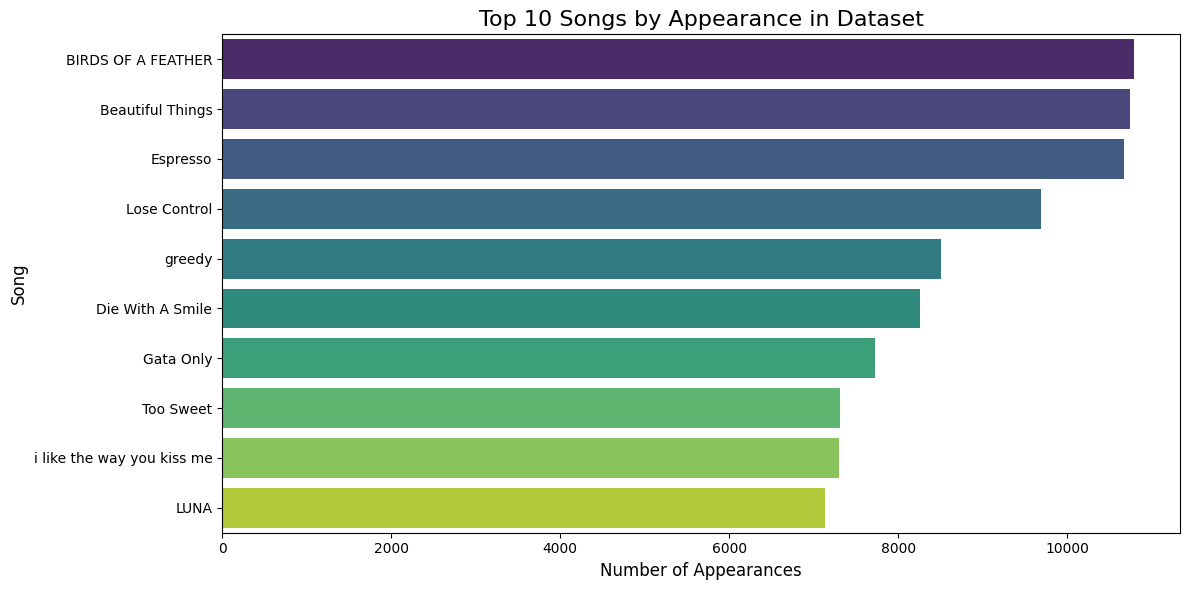

In [50]:
def get_top_songs_by_appearance(data, top_n=10):
    top_songs = (
        data['name']
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    top_songs.columns = ['song', 'appearance_count']
    return top_songs

top_songs = get_top_songs_by_appearance(tracks)
plot_bar_chart(
    top_songs, 
    x='appearance_count', 
    y='song',
    hue='song',
    title='Top 10 Songs by Appearance in Dataset', 
    xlabel='Number of Appearances', 
    ylabel='Song',
    palette='viridis'
)

The chart is led by Billie Eilish's "BIRDS OF A FEATHER," securing the top spot as the most popular song. Following closely is "Beautiful Things" by Benson Boone, which significantly contributes to his 10th-place ranking among the most popular artists. Interestingly, the most popular song from the chart-topping artist Feid lands in 10th place, showcasing the balance of his widespread appeal across multiple tracks. A standout mention goes to Sabrina Carpenter's "Espresso," which claims 3rd place on this list and aligns perfectly with her position among the most popular artists, highlighting her strong individual presence.

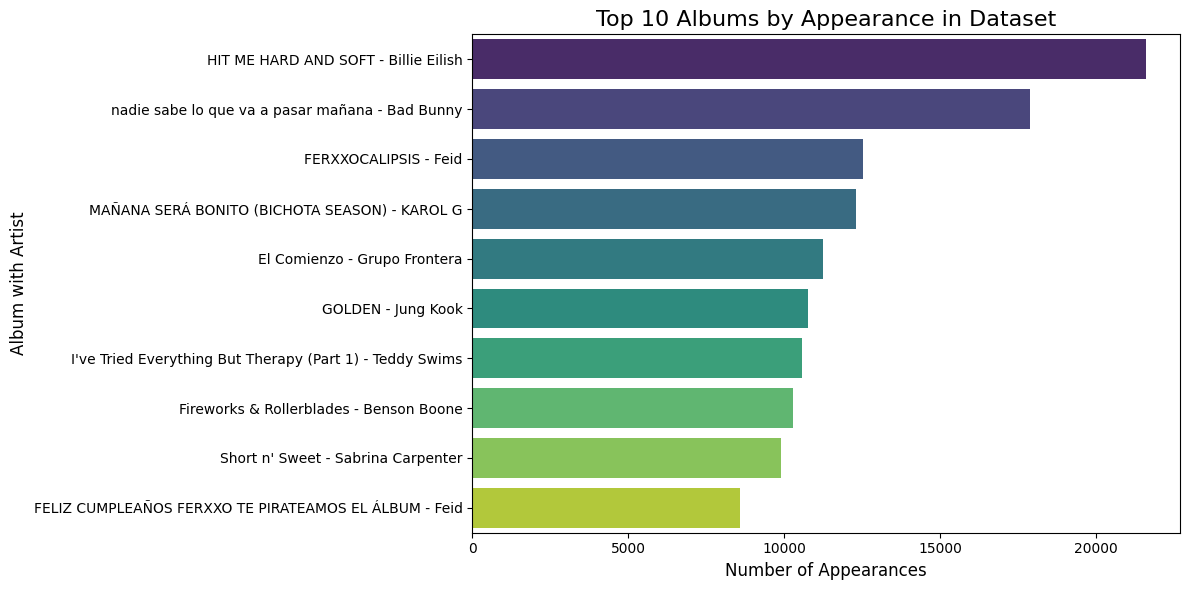

In [51]:
def get_top_albums_by_appearance(data, top_n=10):
    top_albums = (
        data['album_name']
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    top_albums.columns = ['album', 'appearance_count']
    
    top_albums['album_with_artist'] = top_albums['album'] + " - " + top_albums['album'].apply(lambda album: data[data['album_name'] == album]['main_artist'].mode()[0])
    
    return top_albums

top_albums = get_top_albums_by_appearance(tracks)

plot_bar_chart(
    top_albums, 
    x='appearance_count', 
    y='album_with_artist', 
    hue='album_with_artist',
    title='Top 10 Albums by Appearance in Dataset', 
    xlabel='Number of Appearances', 
    ylabel='Album with Artist',
    palette='viridis'
)

The album "HIT ME HARD AND SOFT" by Billie Eilish takes the top spot as the most frequently appearing album in the dataset, reflecting her immense popularity. Following closely is Bad Bunny's "nadie sabe lo que va a pasar mañana", demonstrating his consistent dominance in the global music scene. Feid is the only artist who has got 2 albums in the top 10 with "FERXXOCLAPSIS" and "FELIZ CUMPLEAÑOS FERXXO TE PIRATEAMOS EL ÁLBUM" which again corresponds to his 1st place in the most popular artist char. Another latin performer of Karol G finds place in the top 10 of the most popular albums, highlighting the success of the Latin music genre.

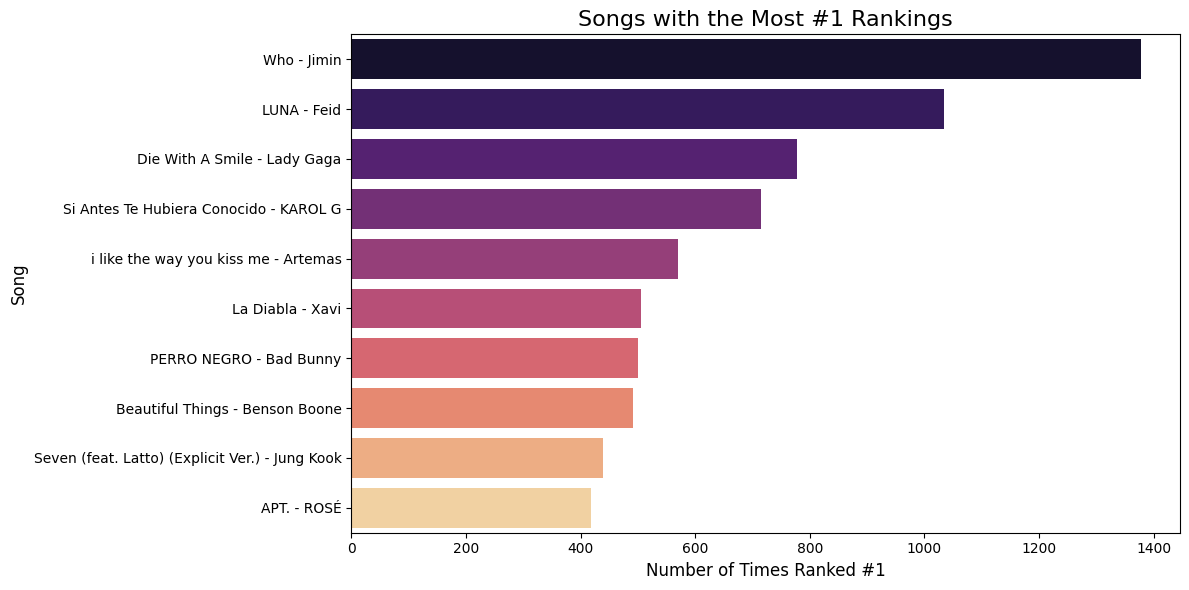

In [52]:
def get_top_rank_1_songs(data, top_n=10):
    rank_1_songs = data[data['daily_rank'] == 1]
    top_rank_1_songs = (
        rank_1_songs['name']
        .value_counts()
        .head(top_n)
        .reset_index()
    )
    top_rank_1_songs.columns = ['song', 'number_of_rank_1']

    top_rank_1_songs['song_with_artist'] = top_rank_1_songs['song'] + " - " + top_rank_1_songs['song'].apply(lambda album: data[data['name'] == album]['main_artist'].mode()[0])
    return top_rank_1_songs

top_rank_1_songs = get_top_rank_1_songs(tracks)
plot_bar_chart(
    top_rank_1_songs, 
    x='number_of_rank_1', 
    y='song_with_artist',
    hue='song_with_artist',
    title='Songs with the Most #1 Rankings', 
    xlabel='Number of Times Ranked #1', 
    ylabel='Song',
    palette='magma'
)

The chart highlights the songs with the most #1 rankings in the dataset. Topping the list is "Who" by Jimin, showcasing his immense popularity amongst the KPOP fanbase. Close behind is Feid's "LUNA", reflecting his consistent dominance in music charts. Lady Gaga's "Die With A Smile" and Karol G's "Si Antes Te Hubiera Conocido" also make impressive appearances, underlining their global appeal. Bad Bunny also features in this chart together with another KPOP artist of Jung Kook.

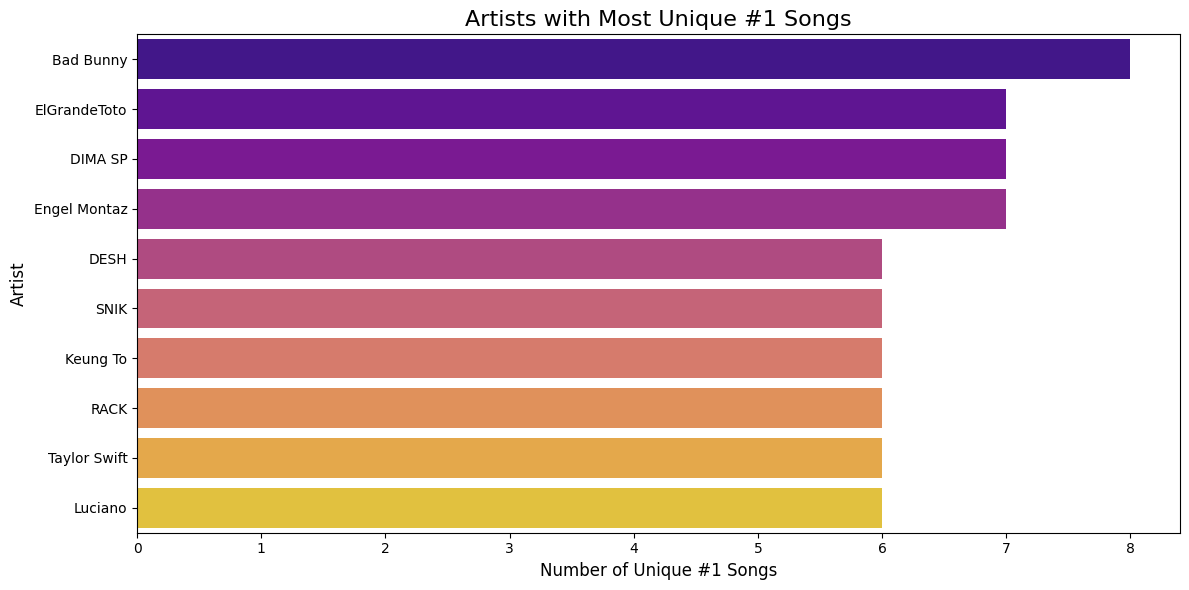

In [53]:
def get_artist_with_most_unique_rank_1_songs(data, top_n=10):
    rank_1_songs = data[data['daily_rank'] == 1]
    artist_unique_rank_1 = (
        rank_1_songs.groupby('main_artist')['name']
        .nunique()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )
    artist_unique_rank_1.columns = ['artist', 'unique_rank_1_songs']
    return artist_unique_rank_1

top_artists_rank_1 = get_artist_with_most_unique_rank_1_songs(tracks)

plot_bar_chart(
    top_artists_rank_1, 
    x='unique_rank_1_songs', 
    y='artist',
    hue='artist', 
    title='Artists with Most Unique #1 Songs', 
    xlabel='Number of Unique #1 Songs', 
    ylabel='Artist', 
    palette='plasma'
)

Bad Bunny reigns supreme with the highest number of unique songs (8) that have claimed the #1 spot on music charts across the globe. His dominance reflects his unparalleled reach and influence in the music industry. Following him are artists from Africa, whose achievements highlight the vibrant and dynamic music scene on the continent. However, their relatively lower recognition in European and American markets underscores the regional differences in global music preferences. Many of these African artists have secured top spots in charts specific to their continent, showcasing the richness and diversity of African musical talent (we’ll delve deeper into the top artists for the African continent later).

A standout mention goes to global superstar Taylor Swift, who has achieved an impressive feat with six of her songs reaching the #1 position. Her ability to craft chart-topping hits across different genres solidifies her status as one of the most influential artists of this generation. This mix of regional and global stars underscores the variety and cultural depth of the international music scene.

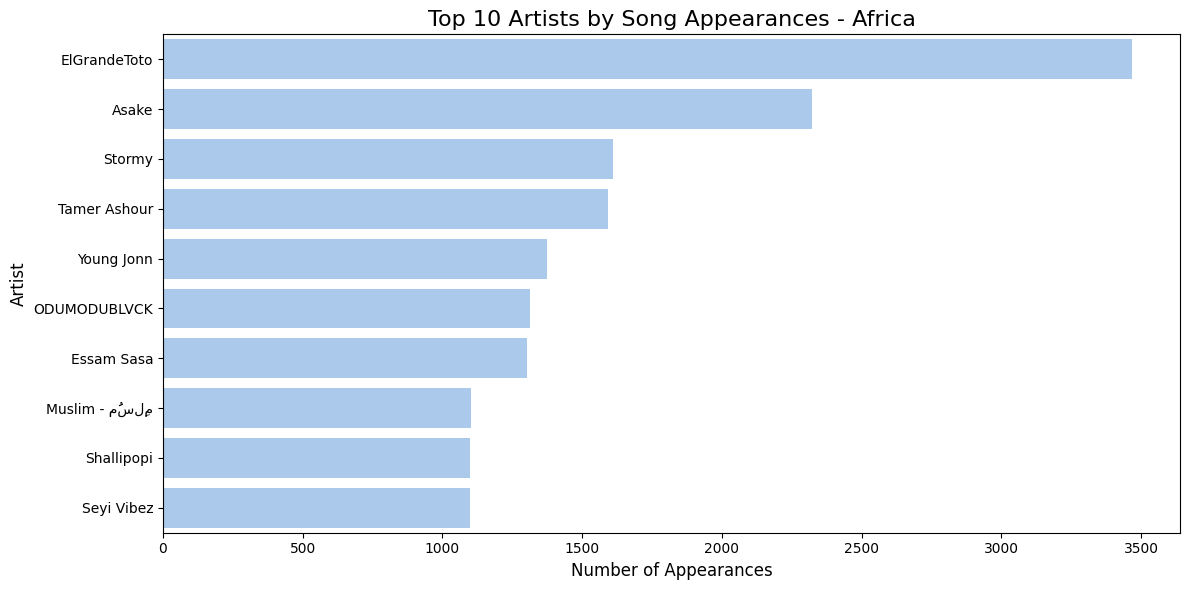

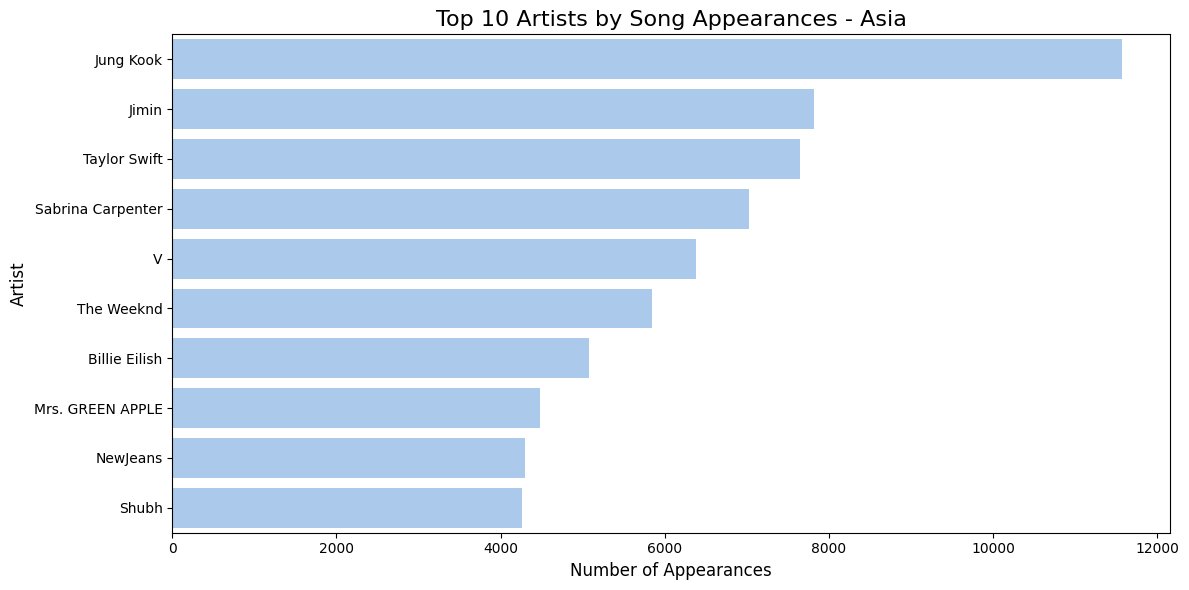

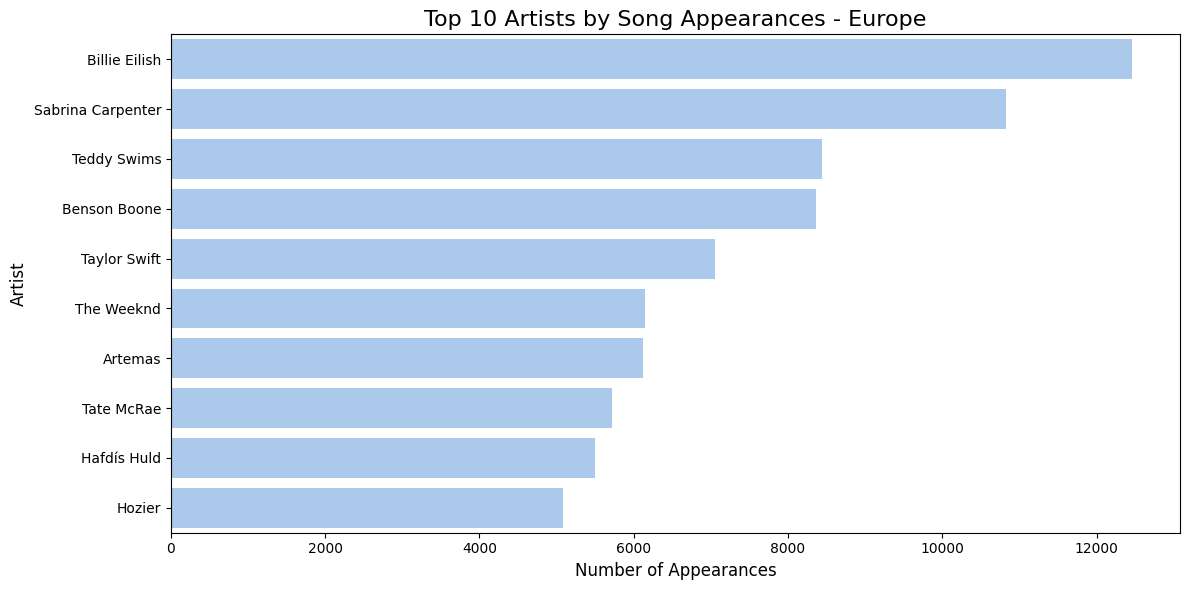

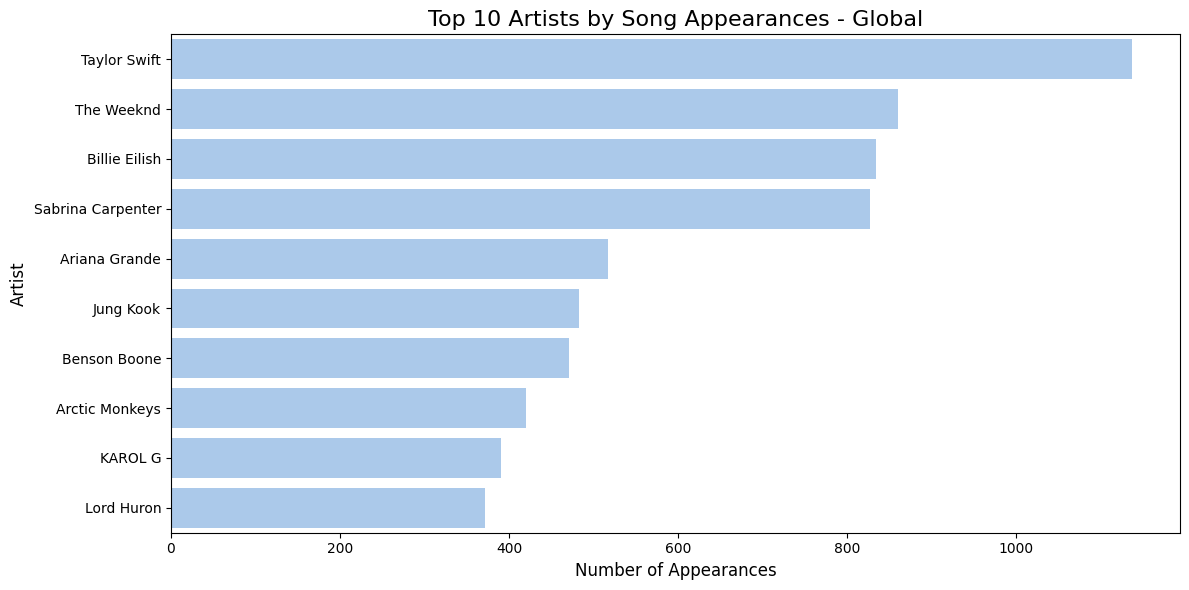

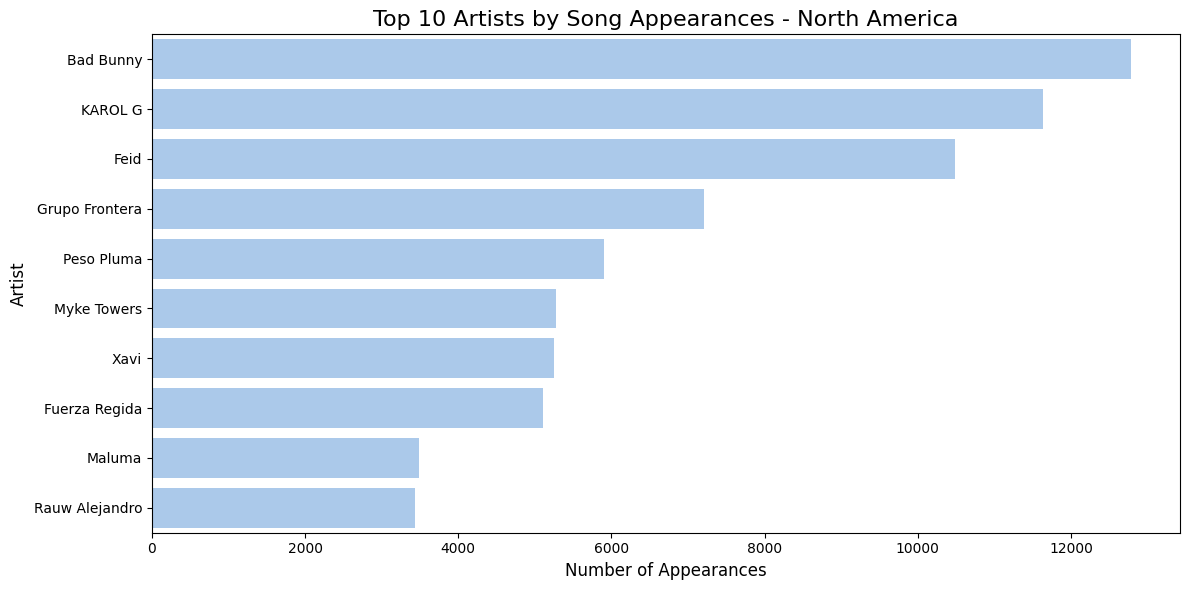

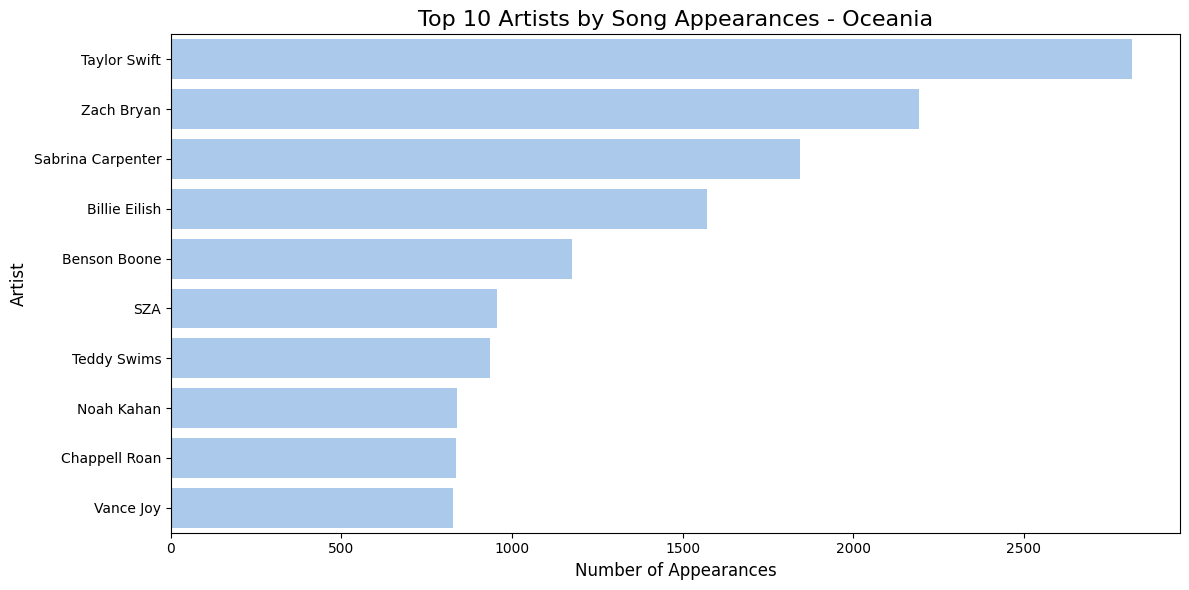

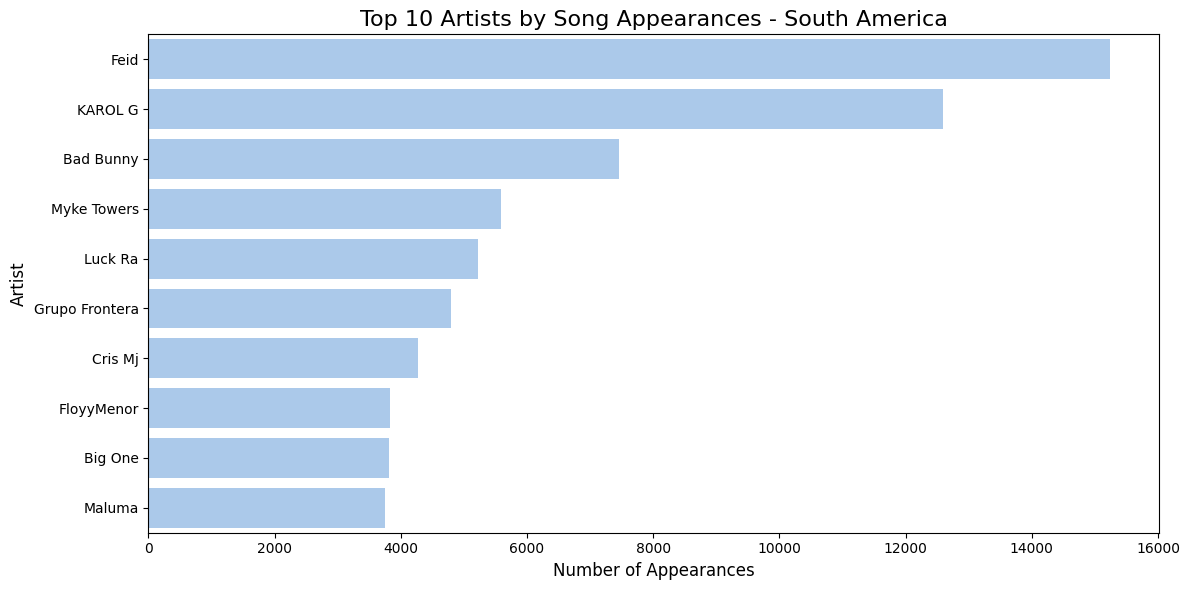

In [54]:
def get_artist_appearance_by_continent(df):
    artist_appearance = df.groupby(['continent', 'main_artist'])['name'].count().reset_index()
    artist_appearance_sorted = artist_appearance.sort_values(['continent', 'name'], ascending=[True, False])
    top_artists_by_continent = artist_appearance_sorted.groupby('continent').head(10)
    
    return top_artists_by_continent

top_artists_by_continent = get_artist_appearance_by_continent(tracks)

continents = top_artists_by_continent['continent'].unique()

for continent in continents:
    continent_data = top_artists_by_continent[top_artists_by_continent['continent'] == continent]

    plot_bar_chart(
        data=continent_data, 
        x='name', 
        y='main_artist', 
        hue='continent',
        title=f'Top 10 Artists by Song Appearances - {continent}', 
        xlabel='Number of Appearances', 
        ylabel='Artist',
        palette='pastel'
    )

The music industry presents a fascinating diversity when analyzed through the lens of regional charts. In Africa, the popular artists are distinctively different from those in other parts of the world, with local and regional influences taking the forefront. Meanwhile, Asia's music scene is heavily influenced by K-pop, with the likes of BTS members Jung Kook, Jimin, and V maintaining a dominant presence. Additionally, the rise of New Jeans, a fast-growing female K-pop group, is reshaping the region’s musical landscape.

On a global scale, a few artists transcend borders, gaining popularity across continents. Superstars like Taylor Swift, Sabrina Carpenter, Billie Eilish, and The Weeknd have consistently topped charts worldwide, solidifying their international appeal.

In the Americas, the Latin music scene reigns supreme, with artists like Bad Bunny, Feid, and Karol G leading the charge. Latin influence is particularly pronounced in North and South America, though South American tastes reveal a bit more variety beyond these Latin giants, showcasing a broader range of genres and regional preferences.

In Europe, the chart trends closely mirror the 'Global' chart, with many of the same artists holding top spots. However, Europe’s unique blend of local and global sounds adds a distinct flavor to the overall music industry picture. This regional analysis highlights how local tastes and cultural influences continue to shape the global music scene, creating a dynamic and ever-evolving industry.

In [55]:
import plotly.express as px

categories = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
for category in categories:
    country_mean = tracks.groupby(['country']).mean(numeric_only=True).reset_index()
    top_countries = country_mean.nlargest(3, category)[['country', category]]
    print(f'Top 3 countries by mean {category.title()}:')
    for idx, row in enumerate(top_countries.itertuples(), 1):
        print(f"{idx}. {row.country} - {getattr(row, category):.4f}")
    
    bottom_countries = country_mean.nsmallest(3, category)[['country', category]]
    print(f'\nBottom 3 countries by {category.title()}:')
    for idx, row in enumerate(bottom_countries.itertuples(), 1):
        print(f"{idx}. {row.country} - {getattr(row, category):.4f}")
        
    px.choropleth(
        country_mean, 
        locations='country', 
        color=category, 
        locationmode='country names', 
        template='presentation'
    ).update_layout(
        height=600, 
        width=1000, 
        title=f'Mean {category.title()} by Country', 
        font=dict(size=14, family="Franklin Gothic")
    ).show()

Top 3 countries by mean Danceability:
1. Ecuador - 0.7666
2. Colombia - 0.7654
3. Peru - 0.7601

Bottom 3 countries by Danceability:
1. Indonesia - 0.5236
2. Malaysia - 0.5972
3. Ireland - 0.6045


Top 3 countries by mean Energy:
1. Japan - 0.7768
2. Bulgaria - 0.7674
3. Romania - 0.7169

Bottom 3 countries by Energy:
1. Iceland - 0.4987
2. Indonesia - 0.5005
3. Israel - 0.5336


Top 3 countries by mean Loudness:
1. Japan - -4.4738
2. Brazil - -4.8846
3. Bolivia, Plurinational State of - -4.9954

Bottom 3 countries by Loudness:
1. South Africa - -8.8997
2. Iceland - -8.7262
3. Viet Nam - -8.1832


Top 3 countries by mean Valence:
1. Mexico - 0.6894
2. Uruguay - 0.6851
3. Argentina - 0.6597

Bottom 3 countries by Valence:
1. Indonesia - 0.3739
2. Malaysia - 0.4496
3. Israel - 0.4633


Top 3 countries by mean Tempo:
1. Bulgaria - 134.9430
2. Hong Kong - 132.3221
3. Romania - 130.5681

Bottom 3 countries by Tempo:
1. Pakistan - 106.7417
2. India - 107.5129
3. Chile - 110.7828


The music trends reveal interesting regional patterns tied to cultural influences. For example, Bulgaria stands out in both Energy and Tempo, reflecting its vibrant Eastern European musical traditions. Bulgarian folk music, known for its fast-paced rhythms and complex time signatures, directly influences these high scores in both categories. This energetic and dynamic musical style has been adapted into contemporary genres, contributing to Bulgaria's strong presence in modern music trends.

Latin American countries like Ecuador, Colombia, and Mexico excel in Danceability and Valence, emphasizing rhythm and positivity in genres like Salsa, Reggaeton, and Cumbia. These genres prioritize movement and celebration, which likely explains their dominance in these areas.

In contrast, countries like Indonesia and Malaysia show lower scores in Energy and Danceability, possibly due to their more introspective musical traditions, such as Gamelan and traditional folk music. Similarly, Israel and South Africa feature subdued Valence and Loudness, which may reflect cultural and historical contexts that influence a more reflective musical tone.

In summary, regions with rich folk and traditional music, like Eastern Europe and Latin America, show higher energy, tempo, and danceability, while other regions reflect more contemplative or subdued musical expressions.

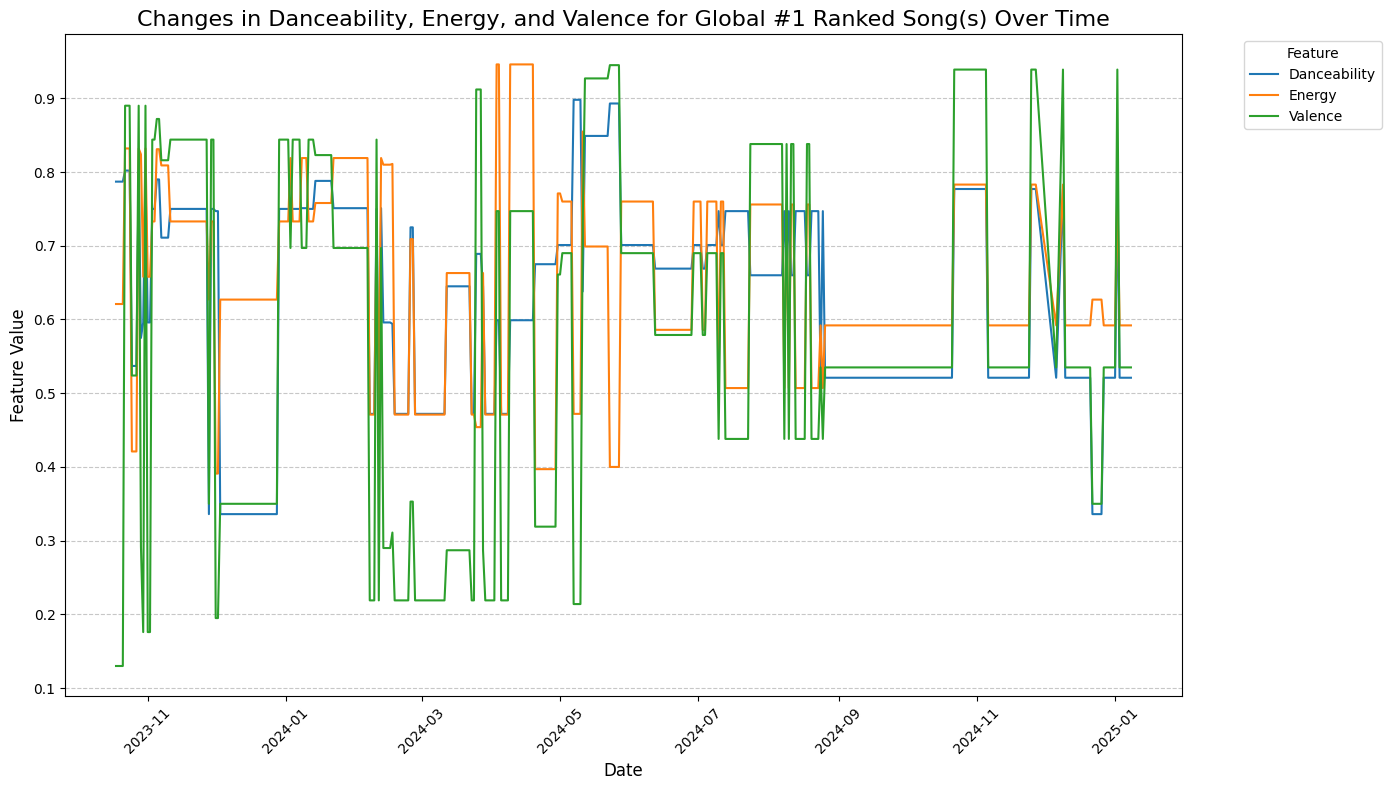

In [56]:
global_rank_1_songs = tracks[(tracks['daily_rank'] == 1) & (tracks['country'] == 'Global')]
global_rank_1_songs_sorted = global_rank_1_songs.sort_values(by='snapshot_date')

plt.figure(figsize=(14, 8))

sns.lineplot(data=global_rank_1_songs_sorted, x='snapshot_date', y='danceability', label='Danceability')
sns.lineplot(data=global_rank_1_songs_sorted, x='snapshot_date', y='energy', label='Energy')
sns.lineplot(data=global_rank_1_songs_sorted, x='snapshot_date', y='valence', label='Valence')

plt.title('Changes in Danceability, Energy, and Valence for Global #1 Ranked Song(s) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Feature Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In this analysis, we aimed to identify trends in how Danceability, Energy, and Valence might contribute to a song reaching the #1 position on the 'Global' chart. Upon reviewing the data, it's evident that the songs that have claimed the top spot exhibit a wide range of characteristics across these dimensions. The lack of a consistent pattern suggests that these factors alone do not determine a song's ability to rise to the top, indicating that achieving the #1 rank may be influenced by a broader set of factors, including genre, artist popularity, cultural context, and more.

Next, let's shift our focus to identify which song has held the #1 position most consecutively on the 'Global' chart. This will give us a better understanding of sustained success and what factors may contribute to a song’s longevity at the top.

In [57]:
from datetime import timedelta

consecutive_songs = []
streak = 0
start_date = global_rank_1_songs_sorted.iloc[0]['snapshot_date']
current_song = global_rank_1_songs_sorted.iloc[0]['name']
first_song = True
for index, row in global_rank_1_songs_sorted.iterrows():
    daily_movement = row['daily_movement']
    if daily_movement != 0:
        if len(consecutive_songs) == 0 and first_song:
            streak += 1
            first_song = False
            continue
        
        current_date = row['snapshot_date']
        consecutive_songs.append({
            'song': current_song,
            'start_date': start_date,
            'end_date': current_date - timedelta(days=1),
            'streak': streak
        })
        start_date = current_date
        streak = 1
        current_song = row['name']
    else:
        streak += 1

consecutive_songs.append({
            'song': current_song,
            'start_date': start_date,
            'end_date': row['snapshot_date'],
            'streak': streak
        })
consecutive_songs_df = pd.DataFrame(consecutive_songs)

max_streak_song = consecutive_songs_df.loc[consecutive_songs_df['streak'].idxmax()]
print(f'Song that has been rank 1 in the "Global" spotify chart the most consecutive times is "{max_streak_song["song"]}" with {max_streak_song["streak"]} days', 
      f'(from {max_streak_song["start_date"].date()} to {max_streak_song["end_date"].date()})')

Song that has been rank 1 in the "Global" spotify chart the most consecutive times is "Die With A Smile" with 57 days (from 2024-08-26 to 2024-10-21)


The result we obtained aligns with the graphic, particularly highlighting the longest unbroken line, which represents the period during which a song consistently maintained its position. This consistency suggests that certain songs enjoyed extended periods of dominance in the charts.

Now, let’s delve into the albums to explore the timeframes during which their tracks have appeared on the charts. This will provide a deeper understanding of how long these albums, and their individual songs, have been influencing the music landscape and staying relevant over time.

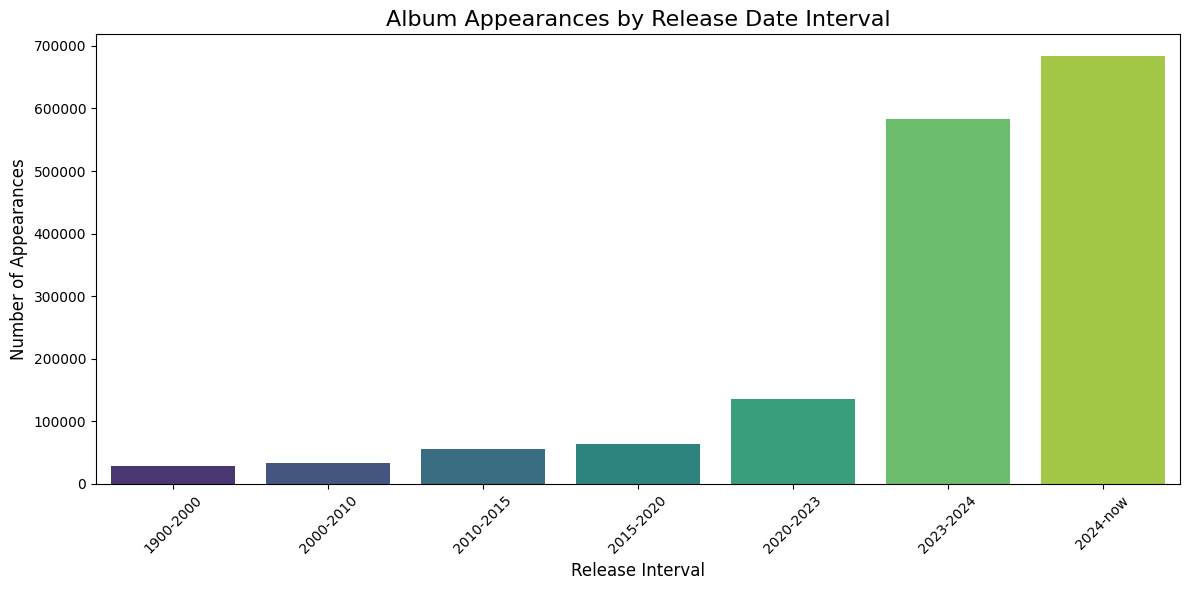

In [58]:
albums = tracks.dropna(subset=['album_name', 'album_release_date']).copy()

time_intervals = [
    (pd.to_datetime('2024-01-01'), pd.to_datetime('now')),
    (pd.to_datetime('2023-01-01'), pd.to_datetime('2024-01-01')),
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2023-01-01')),
    (pd.to_datetime('2015-01-01'), pd.to_datetime('2020-01-01')),
    (pd.to_datetime('2010-01-01'), pd.to_datetime('2015-01-01')),
    (pd.to_datetime('2000-01-01'), pd.to_datetime('2010-01-01')),
    (pd.to_datetime('1900-01-01'), pd.to_datetime('2000-01-01')),
]

interval_labels = ['2024-now', '2023-2024', '2020-2023', '2015-2020', '2010-2015', '2000-2010', '1900-2000']

def categorize_interval(release_date):
    for i, (start, end) in enumerate(time_intervals):
        if start < release_date <= end:
            return interval_labels[i]


albums.loc[:, 'release_interval'] = albums['album_release_date'].apply(categorize_interval)

appearances_by_interval = albums.groupby(['release_interval']).size().reset_index(name='appearance_count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=appearances_by_interval, 
    x='release_interval', 
    y='appearance_count', 
    hue='release_interval', 
    palette='viridis'
)
plt.title('Album Appearances by Release Date Interval', fontsize=16)
plt.xlabel('Release Interval', fontsize=12)
plt.ylabel('Number of Appearances', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As we observed, the earliest date in our dataset is from 2023-10-18, which explains why albums from 2023 onwards are more prominently represented. It's also clear that the older a song is, the less likely it is to appear in the top charts, which makes sense—over time, songs are more likely to be forgotten or overshadowed by newer releases.

Now, let's take a closer look at the spread of the most popular songs within the time intervals we've set. It will be particularly interesting to examine which songs from the 20th century have managed to remain relevant and appear in the top charts during the 2023-2024 period. This could shed light on the enduring appeal of certain tracks and how they continue to resonate with audiences today.

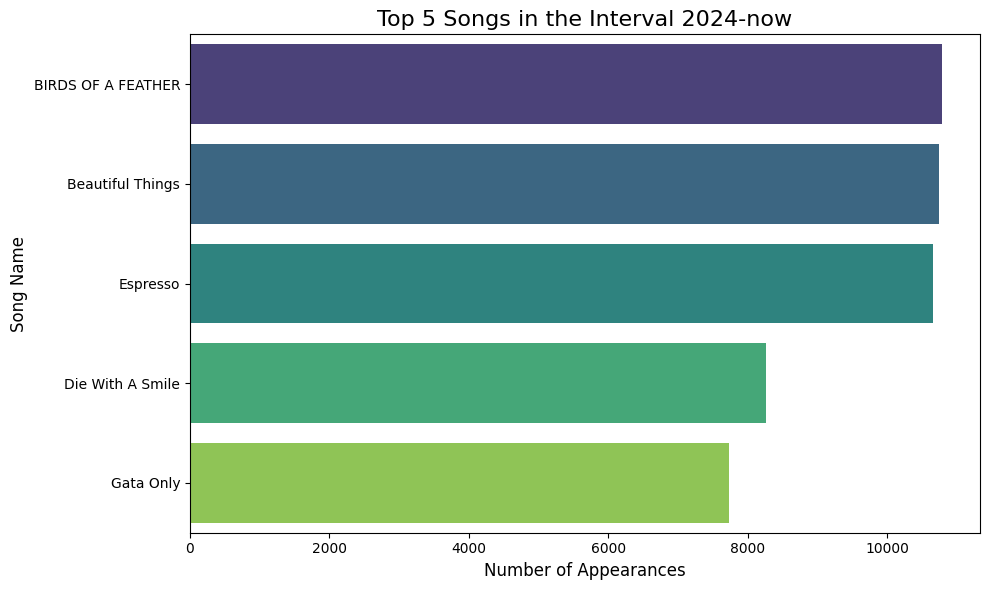

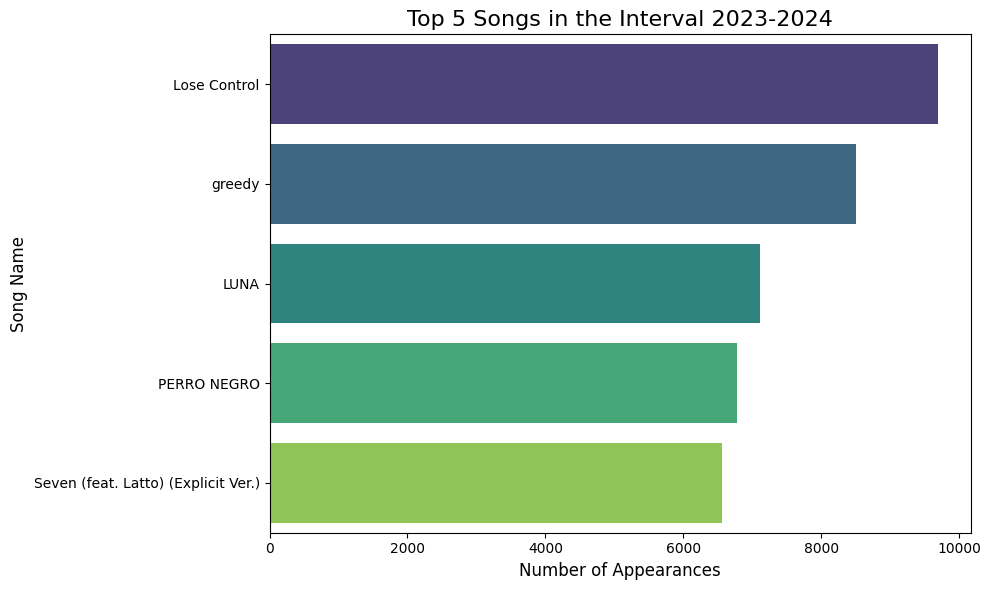

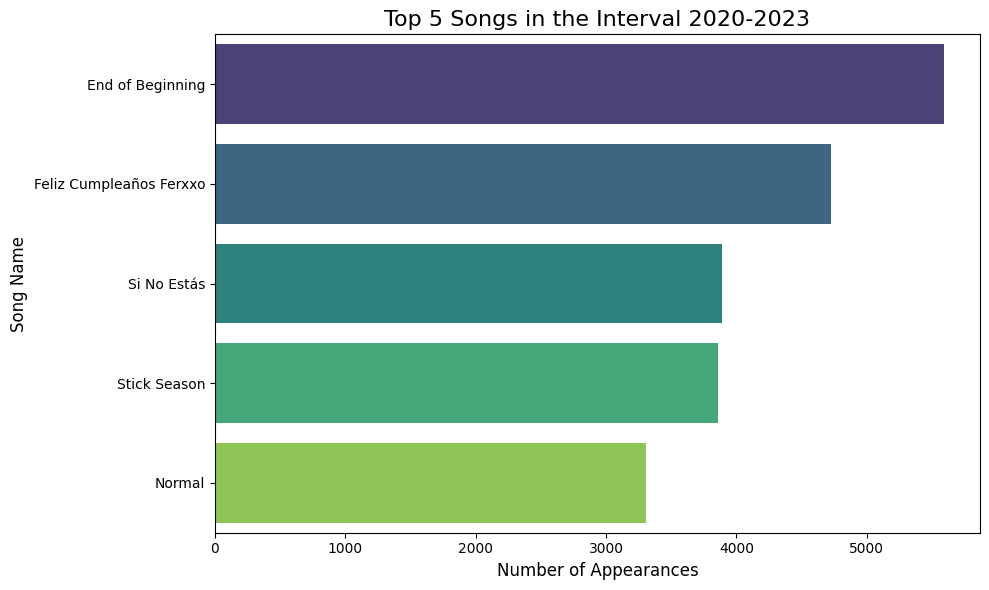

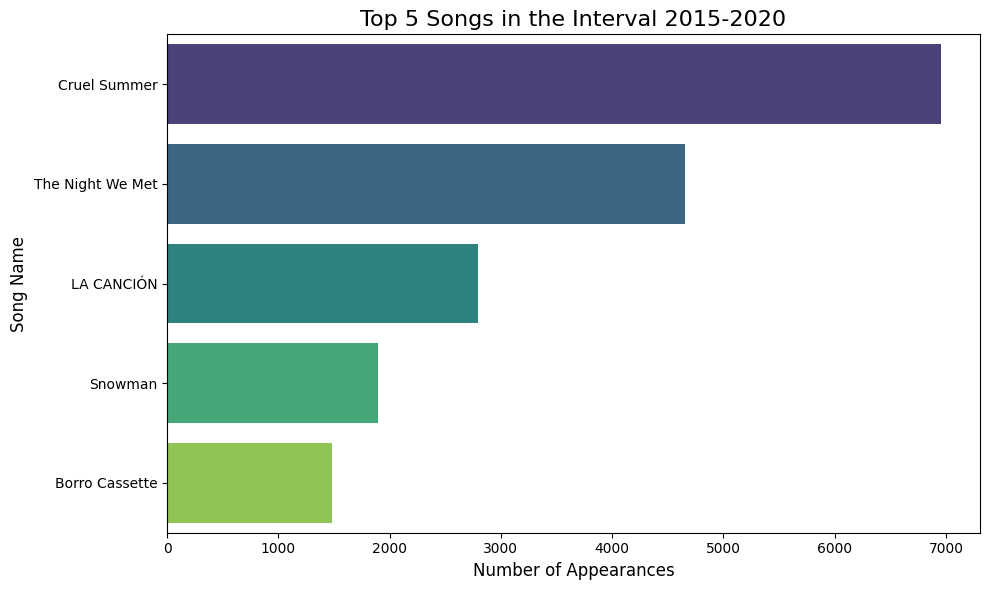

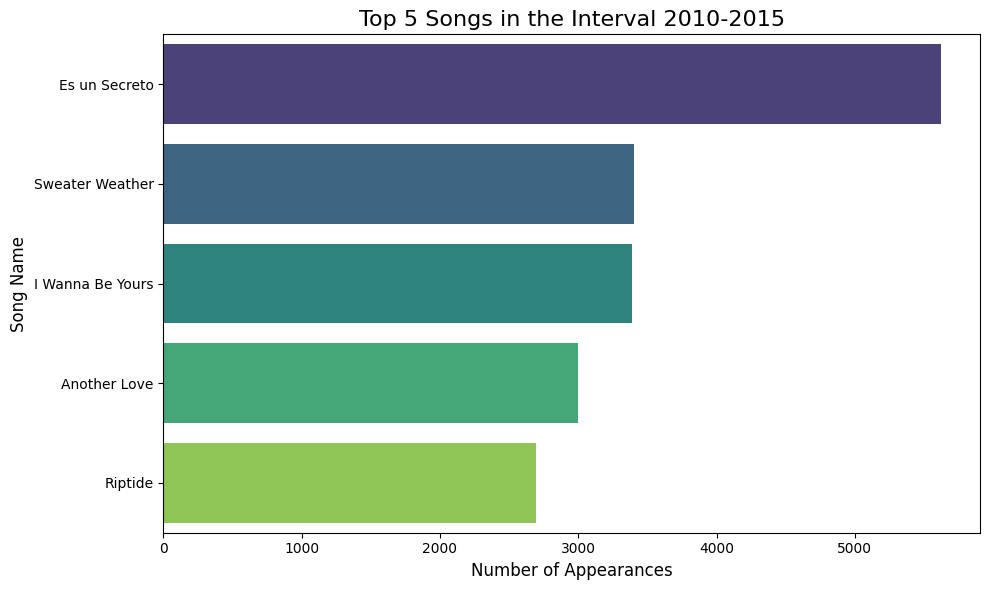

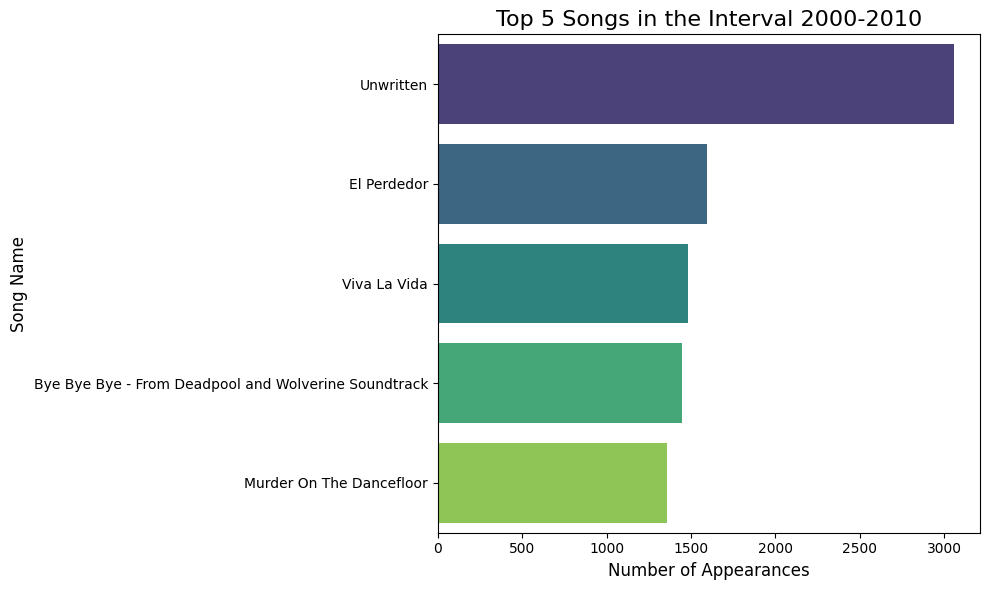

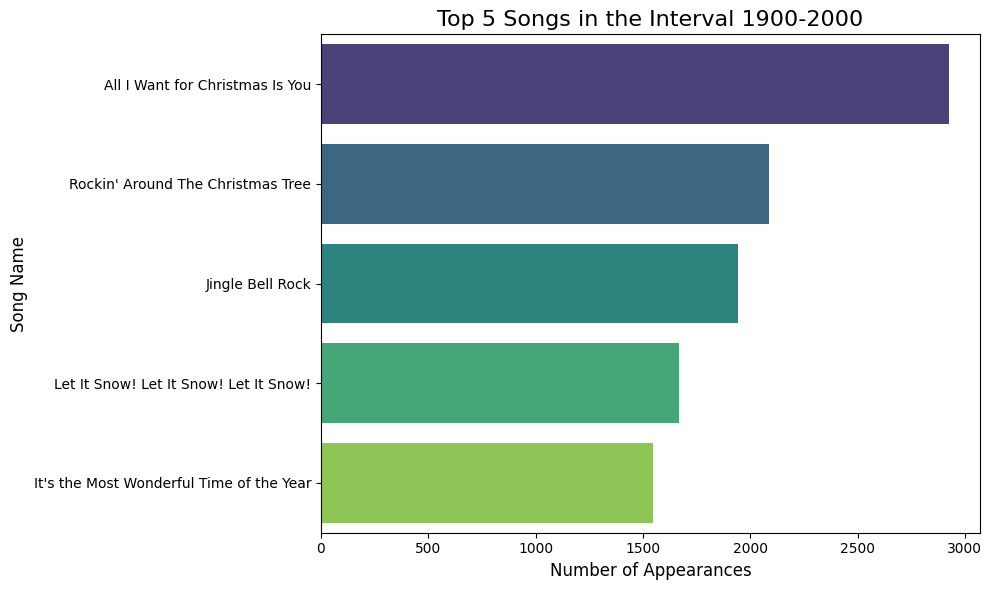

In [59]:
top_songs_by_interval = albums.groupby(['release_interval', 'main_artist', 'name'])['name'].count().reset_index(name='count')
top_songs_by_interval_sorted = top_songs_by_interval.sort_values(by='count', ascending=False)
top_5_songs_by_interval = top_songs_by_interval_sorted.groupby('release_interval').head(5)

for interval in interval_labels:
    interval_data = top_5_songs_by_interval[top_5_songs_by_interval['release_interval'] == interval]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=interval_data,
        x='count',
        y='name',
        hue='name',
        palette='viridis'
    )
    plt.title(f"Top 5 Songs in the Interval {interval}", fontsize=16)
    plt.xlabel('Number of Appearances', fontsize=12)
    plt.ylabel('Song Name', fontsize=12)
    plt.tight_layout()
    plt.show()

The songs appearing in the "2024-now" and "2023-2024" time intervals are largely the same as those we saw earlier among the most popular tracks, which is to be expected given the current trends. Some older Bad Bunny tracks also make appearances in the older time intervals, highlighting their lasting popularity.

The most intriguing finding comes from the "1900-2020" time interval, where all the songs are related to Christmas and the winter season. This is logical, as these songs tend to resurface every year when the holiday season approaches, triggering nostalgia and festive sentiments. A perfect example is "All I Want for Christmas Is You", which seemingly randomly becomes a seasonal favorite each winter, only to fade back into the background once the holidays are over.

To better understand this seasonal pattern, let's visualize this phenomenon by creating a line chart to track its popularity over time and confirm the cyclical nature of its rise and fall each year.

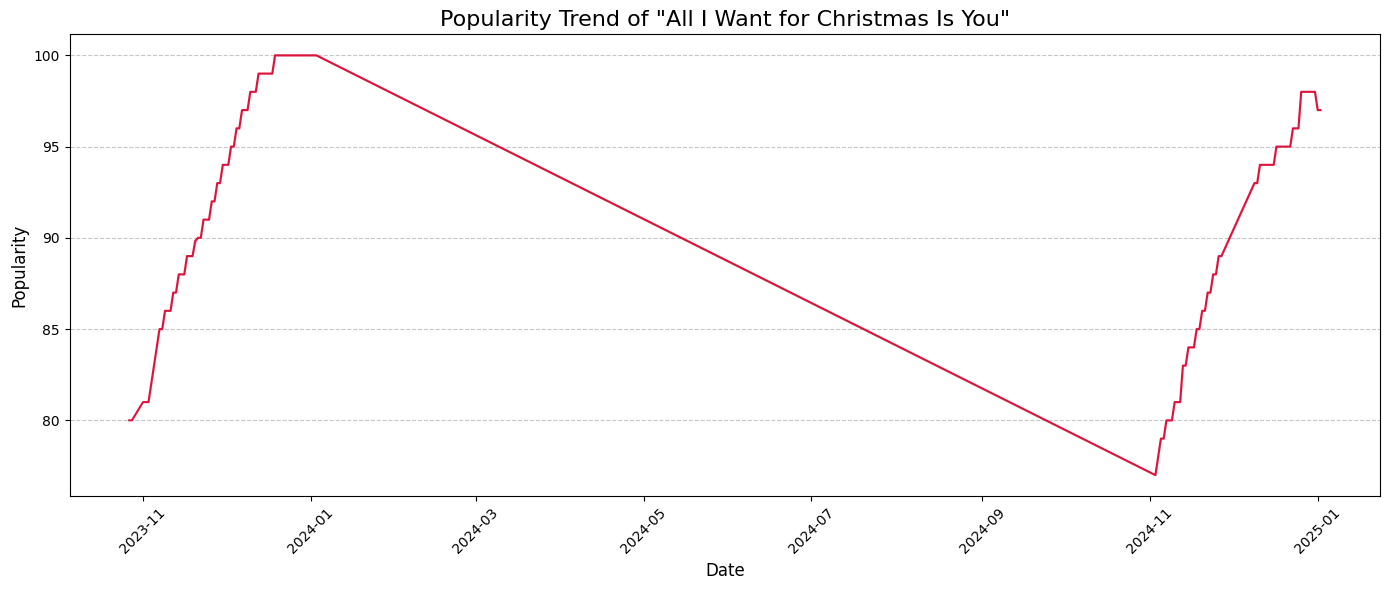

In [60]:
song_popularity = tracks[tracks['name']=="All I Want for Christmas Is You"]

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=song_popularity, 
    x='snapshot_date', 
    y='popularity', 
    color='crimson'
)

plt.title('Popularity Trend of "All I Want for Christmas Is You"', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This confirms the trend we've observed with "All I Want for Christmas Is You". The song begins to gain traction around November, gradually increasing in popularity until it reaches its peak during the holiday season. Afterward, as we enter the early parts of January, its popularity starts to decline. This cycle repeats each year, with the song once again surging in popularity around November as the holiday season approaches. This seasonal pattern reinforces how certain songs, especially those tied to specific times of the year like Christmas, can experience cyclical bursts of popularity.

Let's now take a closer look at the Bulgarian musical trends and explore which songs and artists are dominating the charts. By examining the top performers, we can identify the key characteristics of Bulgarian music that resonate with listeners, including genres, styles, and themes. This will give us a deeper understanding of the country’s current musical landscape and its evolving preferences. Let’s dive into the data and see which tracks and artists have captured the audience's attention in Bulgaria.

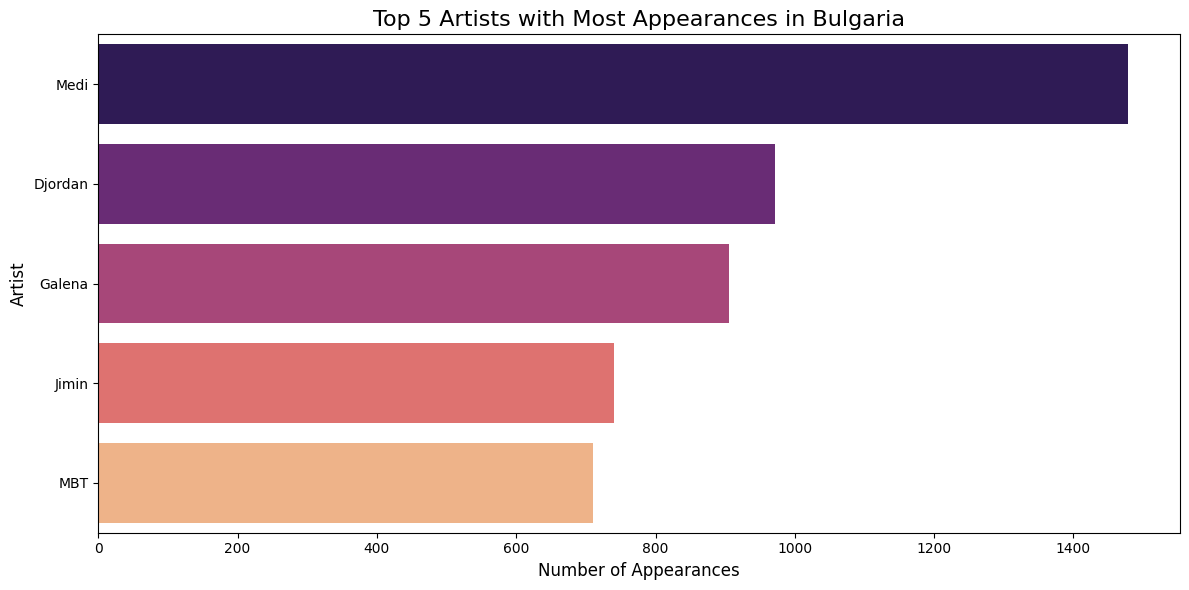

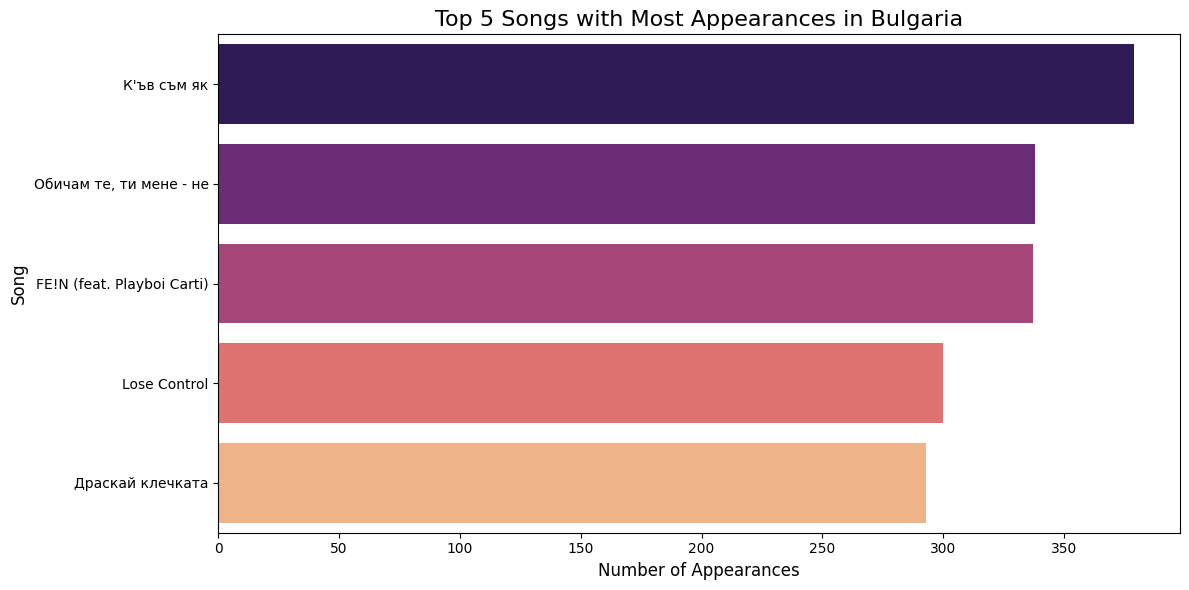

In [61]:
bulgaria_tracks = tracks[tracks['country'] == 'Bulgaria']

top_5_artists = bulgaria_tracks['main_artist'].value_counts().head().reset_index()
top_5_artists.columns = ['main_artist', 'appearance_count']

top_5_songs = bulgaria_tracks['name'].value_counts().head().reset_index()
top_5_songs.columns = ['song', 'appearance_count']

plot_bar_chart(
    data=top_5_artists, 
    x='appearance_count', 
    y='main_artist', 
    hue='main_artist', 
    title='Top 5 Artists with Most Appearances in Bulgaria', 
    xlabel='Number of Appearances', 
    ylabel='Artist',
    palette='magma'
)

plot_bar_chart(
    data=top_5_songs, 
    x='appearance_count', 
    y='song', 
    hue='song', 
    title='Top 5 Songs with Most Appearances in Bulgaria', 
    xlabel='Number of Appearances', 
    ylabel='Song',
    palette='magma'
)

Almost all of the artists in the top rankings, including the first three, are Bulgarian pop-folk performers, which isn't too surprising given the genre's strong popularity among the younger generations, especially those who predominantly use platforms like Spotify. The dominance of pop-folk reflects its cultural significance and appeal, particularly in the current musical climate.

Similarly, the song "К'ъв съм як" by Djordan leading the chart also fits this trend, as it resonates well with the audience. What's particularly interesting is the appearance of Jimin, a K-pop star, in the top 5 artists. This could indicate a growing presence of K-pop influence in Bulgaria, potentially suggesting a strong following for K-pop groups within the country.

As for the song "FE!N", its place in the top 5 is also no surprise. The track has become widely popular, particularly among the youth, largely due to its viral success driven by trends, making it a perfect example of how digital platforms can catapult a song to mainstream success in a short period.

Let's now create a correlation chart between all the music features (such as Danceability, Energy, Loudness, Valence, Tempo, etc.) to visually analyze how strongly they are related to one another. This will help us identify any potential correlations that could allow us to predict one feature based on another. By examining the relationships between the features, we can uncover interesting patterns and gain insights into the underlying connections in the music data.

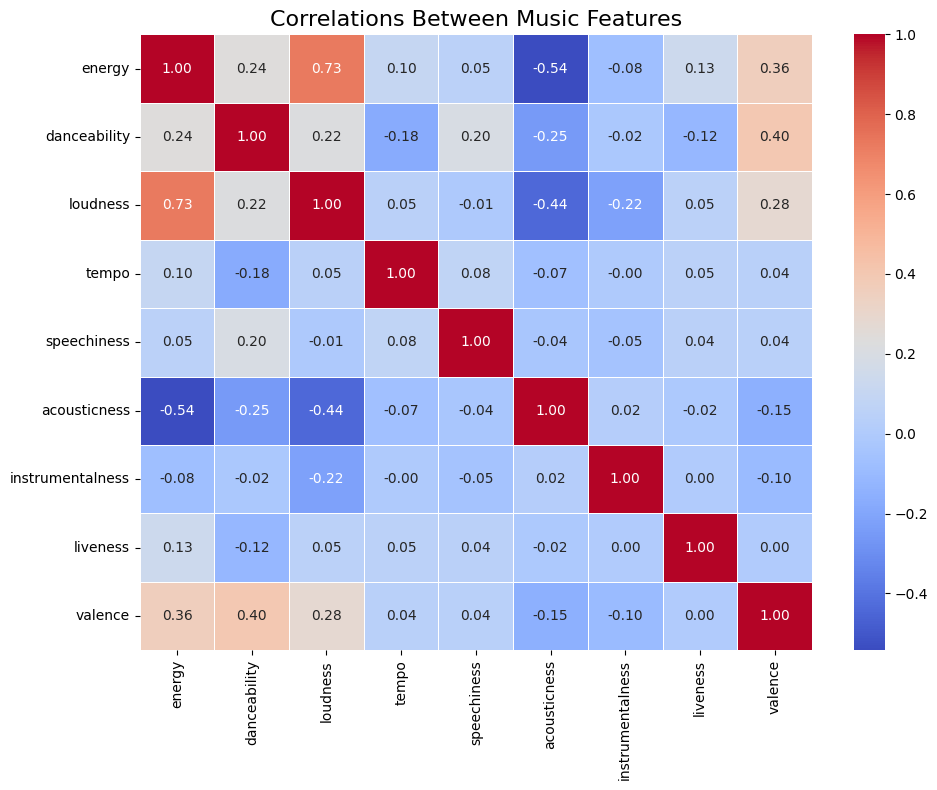

In [62]:
music_features = ['energy', 'danceability', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
correlation_matrix = tracks[music_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlations Between Music Features', fontsize=16)
plt.tight_layout()
plt.show()

Loudness and Energy are closely related and show a strong correlation, which makes sense when we think about how these two elements work together in music. Louder music tends to feel more intense, as it often amplifies the overall impact of the sound, creating a heightened sense of energy. This connection is intuitive—tracks that are more sonically forceful often carry an energetic, dynamic vibe, which is why they frequently correlate with high energy levels. Essentially, louder music has the power to evoke stronger emotional reactions and drive a more vigorous listening experience.

In [63]:
px.scatter(tracks.sample(n=100000, random_state=11), x='loudness', y='energy', template='presentation',
          color_discrete_sequence=['#1DB954'],
           title= 'Strong correlation between energy and loudness'
      ).update_layout(
        font = dict(size=14,family="Franklin Gothic"))